This notebook includes the implemention of the baseline model 2.0 on default data (lettuce) and another, bigger data set to evaluate the influence of more data on the baseline model.

1) Baseline Model 2.0 on original_dataset (e.g. Kaggle Lettuce NPK data)
2) Baseline Model 2.0 on data (e.g. maize disease dataset)


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install opencv-python

__Preparations__

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [2]:
# 1)
# Define the directory path containing the images
data_directory = "/Users/linn/Desktop/original_dataset"
batch_size = 32
image_size = (64, 64)
data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size = image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training")

val_data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)


Found 282 files belonging to 4 classes.
Using 226 files for training.
Found 282 files belonging to 4 classes.
Using 56 files for validation.


In [3]:
# 1)
# Print the class names
class_names = data.class_names
print("Class names:", class_names)


Class names: ['deficiency_nitrogen', 'deficiency_phosphorus', 'deficiency_potassium', 'healthy']


In [4]:
# 1)
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the baseline model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [6]:
# 1)
# Train the model
history = model.fit(data, validation_data= val_data, epochs=40)

Epoch 1/40
8/8 [==============================] - 2s 80ms/step - loss: 61.3503 - accuracy: 0.2566 - val_loss: 2.0620 - val_accuracy: 0.3571
Epoch 2/40
8/8 [==============================] - 1s 66ms/step - loss: 1.6517 - accuracy: 0.3496 - val_loss: 1.2331 - val_accuracy: 0.3929
Epoch 3/40
8/8 [==============================] - 2s 68ms/step - loss: 1.1577 - accuracy: 0.4956 - val_loss: 1.1321 - val_accuracy: 0.5357
Epoch 4/40
8/8 [==============================] - 2s 64ms/step - loss: 0.8609 - accuracy: 0.6637 - val_loss: 1.0026 - val_accuracy: 0.6071
Epoch 5/40
8/8 [==============================] - 2s 77ms/step - loss: 0.7861 - accuracy: 0.7124 - val_loss: 1.1019 - val_accuracy: 0.5536
Epoch 6/40
8/8 [==============================] - 2s 73ms/step - loss: 0.6210 - accuracy: 0.7743 - val_loss: 0.9759 - val_accuracy: 0.6250
Epoch 7/40
8/8 [==============================] - 2s 74ms/step - loss: 0.3705 - accuracy: 0.8850 - val_loss: 1.3079 - val_accuracy: 0.5893
Epoch 8/40
8/8 [==========

In [8]:
# 1)
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_data)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

2/2 [==============================] - 0s 10ms/step - loss: 2.2073 - accuracy: 0.6429
Validation Loss: 2.2073233127593994
Validation Accuracy: 0.6428571343421936


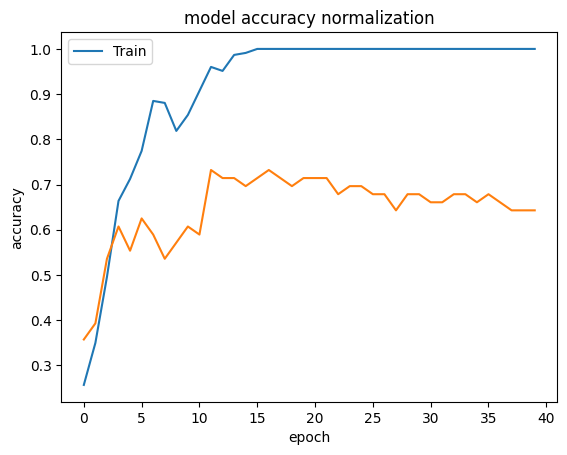

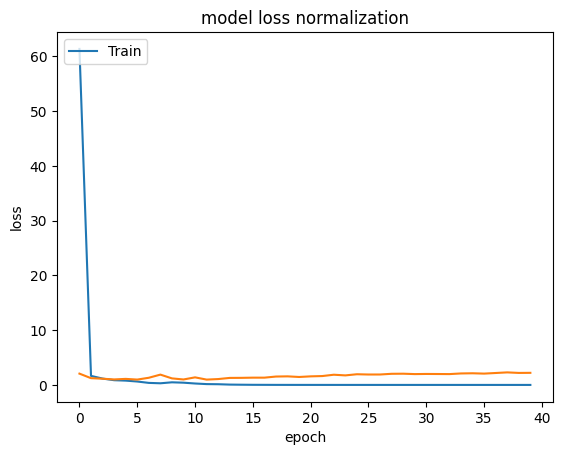

In [11]:
# 1)
# plotting the loss and accuracy
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy normalization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss normalization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

__New Data__

So far the normal baseline model was used. Now the same pipeline will be used for data from another dataset. The new dataset has more images.


In [12]:
# 2)
# Define the directory path containing the images
data_directory = "/Users/linn/Desktop/data"
batch_size = 32
image_size = (64, 64)
data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size = image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training")

val_data = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)


Found 4188 files belonging to 4 classes.
Using 3351 files for training.
Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [13]:
# 2)
# Print the class names
class_names = data.class_names
print("Class names:", class_names)


Class names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [15]:
# 2)
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the baseline model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 128)        

In [16]:
# 2)
# Train the model
history = model.fit(data, validation_data= val_data, epochs=40)

Epoch 1/40
105/105 [==============================] - 7s 59ms/step - loss: 3.6705 - accuracy: 0.7165 - val_loss: 0.4421 - val_accuracy: 0.8148
Epoch 2/40
105/105 [==============================] - 6s 57ms/step - loss: 0.4306 - accuracy: 0.8278 - val_loss: 0.5041 - val_accuracy: 0.8005
Epoch 3/40
105/105 [==============================] - 6s 57ms/step - loss: 0.3130 - accuracy: 0.8678 - val_loss: 0.3481 - val_accuracy: 0.8471
Epoch 4/40
105/105 [==============================] - 6s 55ms/step - loss: 0.2740 - accuracy: 0.8827 - val_loss: 0.2954 - val_accuracy: 0.8853
Epoch 5/40
105/105 [==============================] - 6s 56ms/step - loss: 0.2203 - accuracy: 0.9102 - val_loss: 0.2937 - val_accuracy: 0.8746
Epoch 6/40
105/105 [==============================] - 6s 57ms/step - loss: 0.2184 - accuracy: 0.9114 - val_loss: 0.3765 - val_accuracy: 0.8710
Epoch 7/40
105/105 [==============================] - 6s 57ms/step - loss: 0.2069 - accuracy: 0.9132 - val_loss: 0.3507 - val_accuracy: 0.8722

In [17]:
# 2)
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_data)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

27/27 [==============================] - 1s 26ms/step - loss: 0.6310 - accuracy: 0.8937
Validation Loss: 0.6309828758239746
Validation Accuracy: 0.8936678767204285


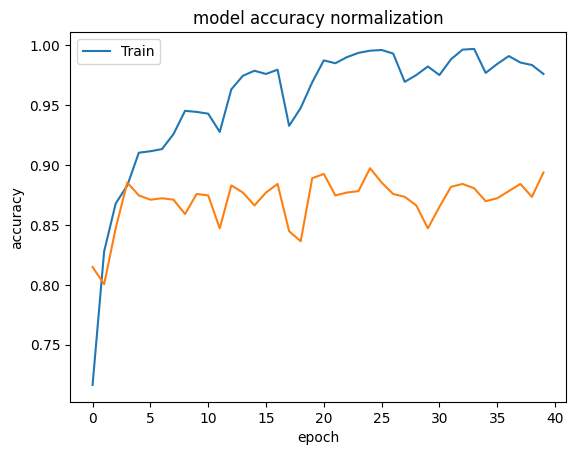

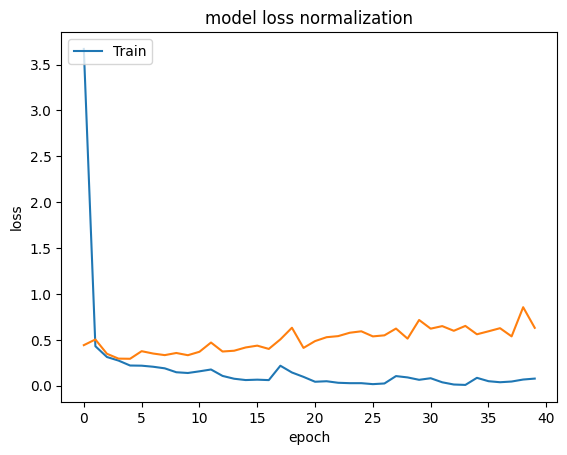

In [19]:
# 2)
# plotting the loss and accuracy
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy normalization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss normalization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()